In [1]:
import sys
sys.path.append(r'~\Desktop\Programmazione\Github\tum-adlr-11')


import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import torch
from PIL import Image
from dataset.preprocessing import sample_pixels, segmap_to_binary, binary_to_image
import torchvision.transforms as transforms

# Import the UNet class
from model.my_unet_model import UNet
from visualization.view_result import ray_shooting


In [2]:
# Specify the device
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'

# Load the model and map it to the GPU
model = torch.load("model_full.pth", map_location=device)

# Set the model to evaluation mode
model.eval()

print("Model loaded onto", device)

Model loaded onto cpu


C:\Users\iacop\AppData\Local\Temp\ipykernel_22096\3389642070.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model_full.pth", map_location=device)


In [3]:
def number_to_border( x, length, height):
    if x <= length:
        return (0, x)  #Top border
    elif x <= length + height:
        return (x - length, length - 1)  # Right border
    elif x <= 2 * length + height:
        return (height - 1, 2 * length + height - x)  # Bottom border
    else:
        return (2 * (length + height) - x, 0)  # Left border

torch.Size([1, 1, 224, 224])


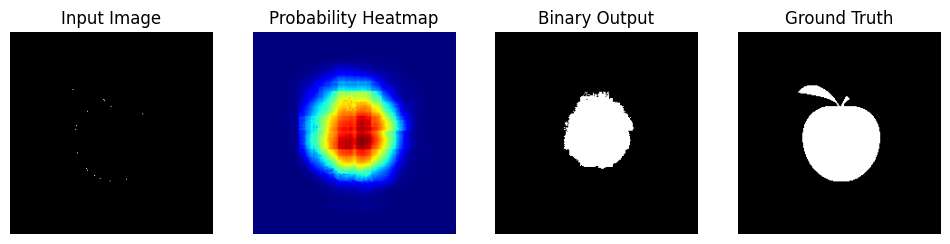

Loss: 0.11454654484987259


In [4]:
# Load the test image
image_path = r"./data/samples/119/0.png"
image = Image.open(image_path).convert('L')
image = np.array(image)
target_image_path = r"./data/119.png"
target_image = Image.open(target_image_path).convert('L')
target_image = np.array(target_image)
input = transforms.ToTensor()(image).unsqueeze(0).to(device)



# Assuming the model is defined and loaded
model.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates)
with torch.no_grad():  # Disable gradient calculation for evaluation
    y = model(input)  # Get the model's predictions

print(y.shape)

y_image = y[0][0].cpu().numpy()
binary_output = (y_image > 0.5).astype(np.uint8)
#show image, probability heatmap and ground truth
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(y_image, cmap='jet')
plt.title('Probability Heatmap')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(binary_output, cmap='gray')
plt.title('Binary Output')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(target_image, cmap='gray')
plt.title('Ground Truth')
plt.axis('off')
plt.show()

#Calculate loss
loss = torch.nn.BCELoss()
target = transforms.ToTensor()(target_image).unsqueeze(0).to(device)
loss_value = loss(y, target)
print('Loss:', loss_value.item())




Length and height = 224 224
255
Selected Border Point (x, y): (0, 70)
Ray Shooting Angle: 18 degrees
Ray Shooting Result: (x, y) = (62, 90)
Angle for Ray: 18 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


C:\Users\iacop\AppData\Local\Temp\ipykernel_22096\1214784868.py:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


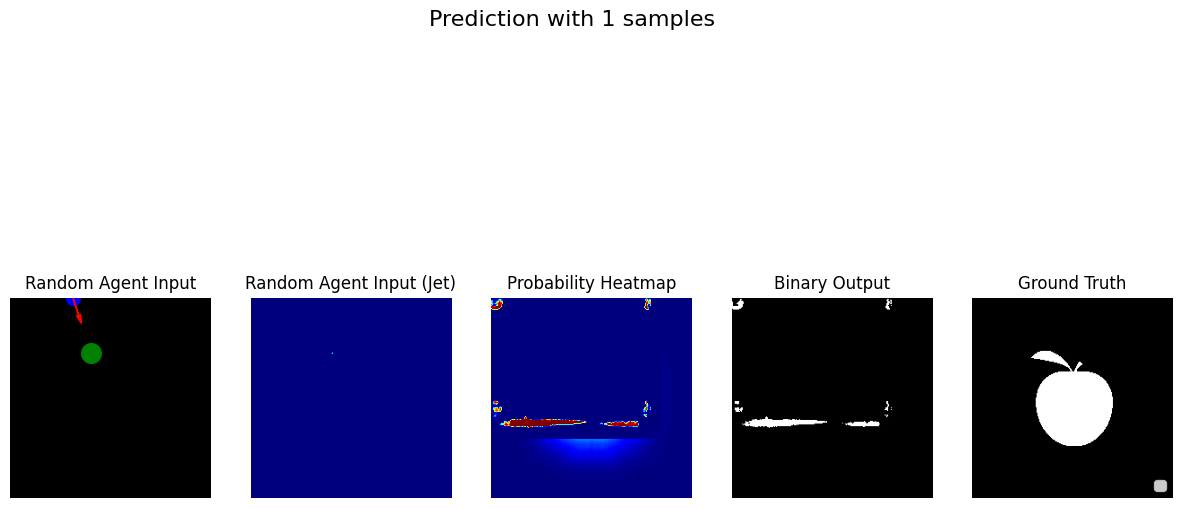

510
Selected Border Point (x, y): (223, 174)
Ray Shooting Angle: 206 degrees
Ray Shooting Result: (x, y) = (154, 140)
Angle for Ray: 206 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


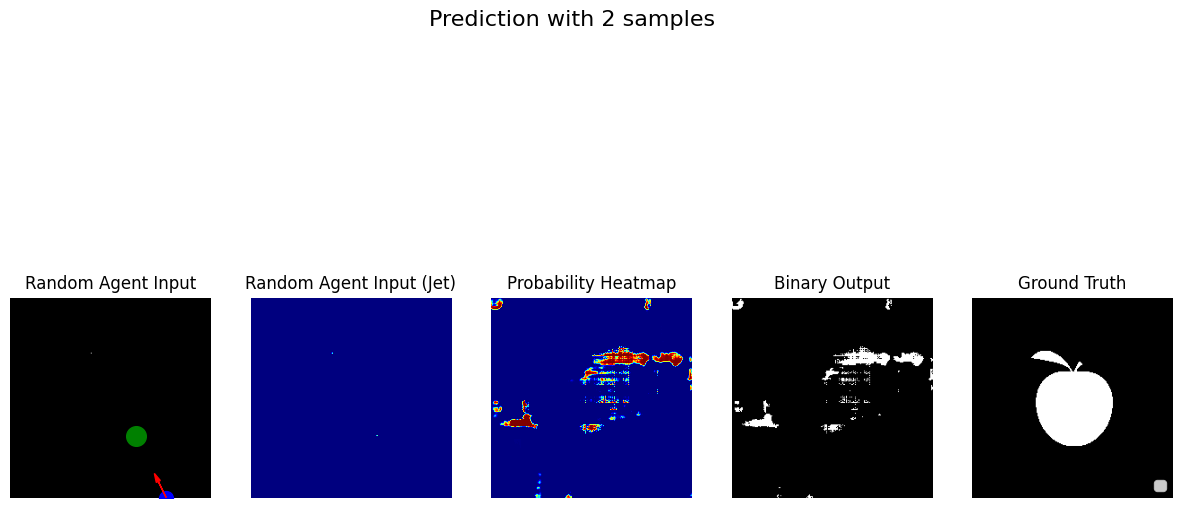

765
Selected Border Point (x, y): (18, 223)
Ray Shooting Angle: 286 degrees
Ray Shooting Result: (x, y) = (60, 78)
Angle for Ray: 286 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


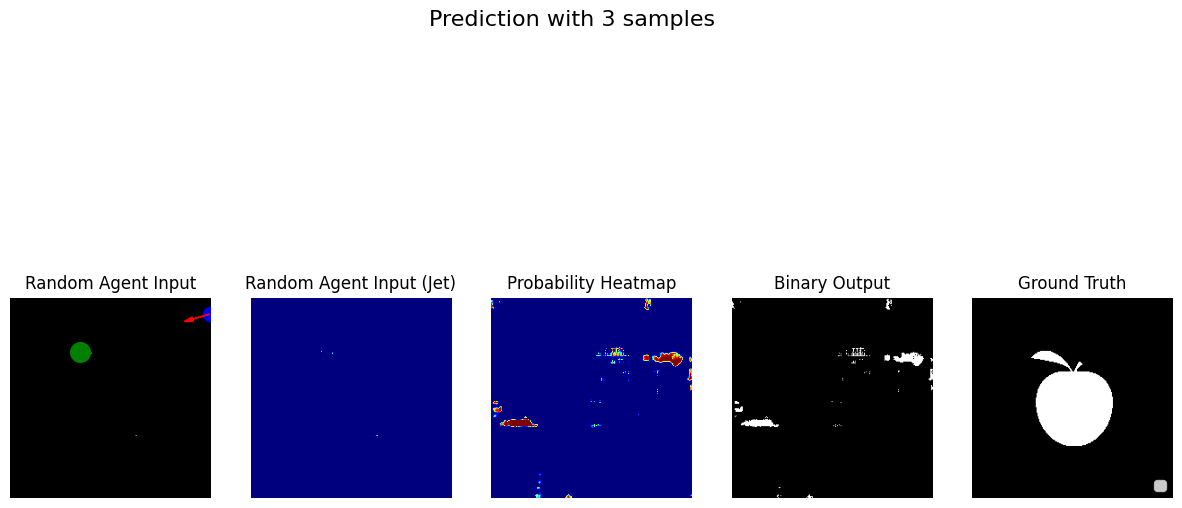

1020
Selected Border Point (x, y): (223, 128)
Ray Shooting Angle: 193 degrees
Ray Shooting Result: (x, y) = (165, 115)
Angle for Ray: 193 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


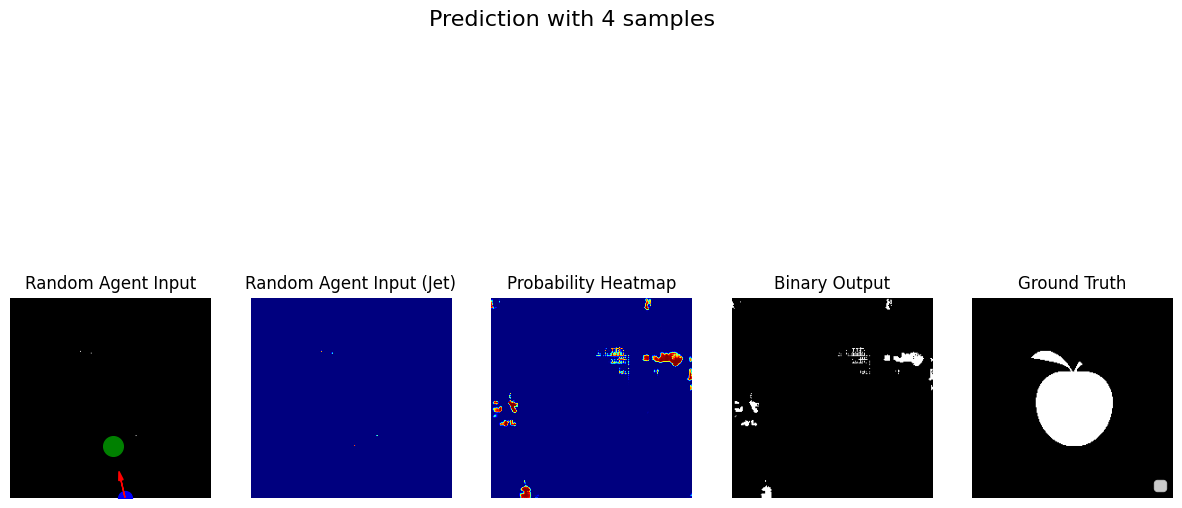

1275
Selected Border Point (x, y): (85, 223)
Ray Shooting Angle: 281 degrees
Ray Shooting Result: (x, y) = (99, 152)
Angle for Ray: 281 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


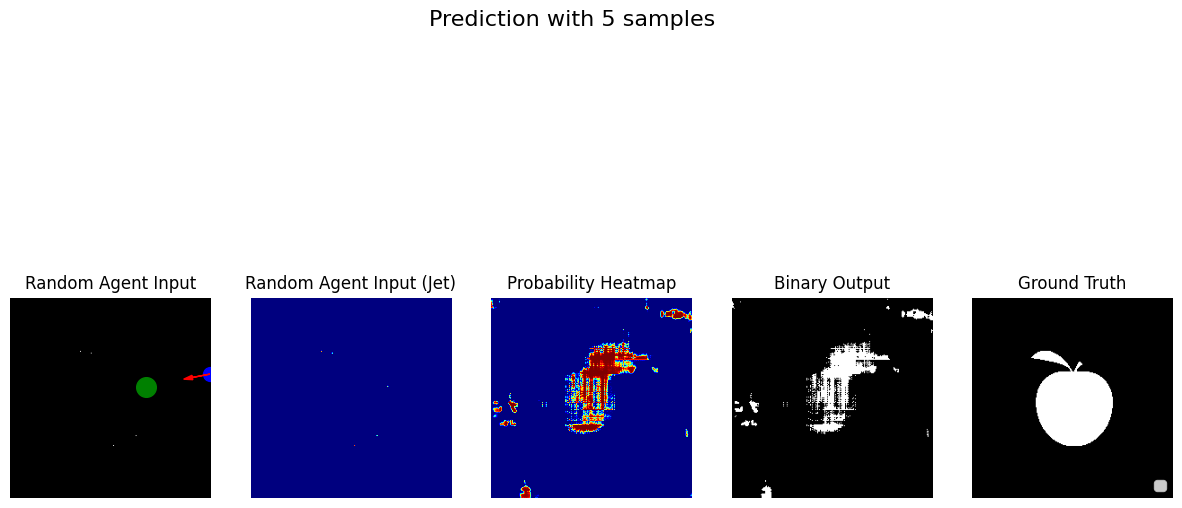

1530
Selected Border Point (x, y): (207, 0)
Ray Shooting Angle: 112 degrees
Ray Shooting Result: (x, y) = (165, 105)
Angle for Ray: 112 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


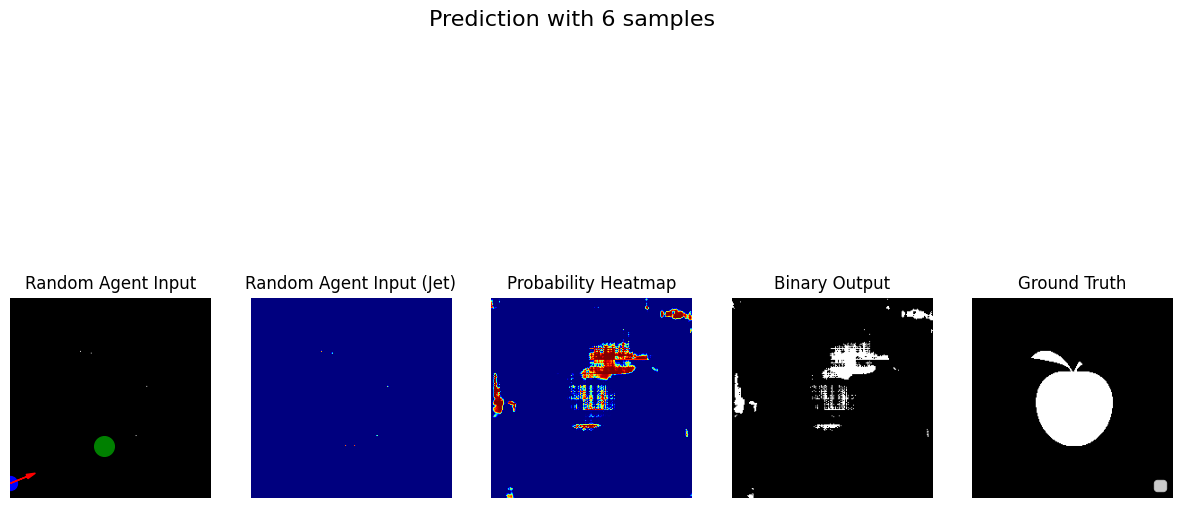

1785
Selected Border Point (x, y): (14, 0)
Ray Shooting Angle: 55 degrees
Ray Shooting Result: (x, y) = (63, 70)
Angle for Ray: 55 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


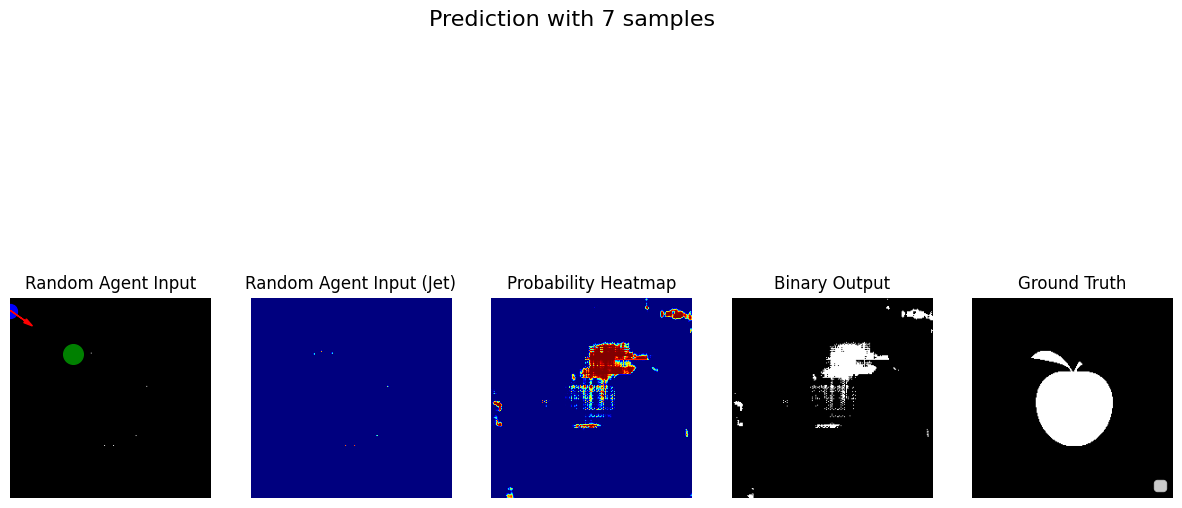

1785
Selected Border Point (x, y): (11, 223)
Ray Shooting Angle: 321 degrees
Ray Shooting Result: (x, y) = (99, 152)
Angle for Ray: 321 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


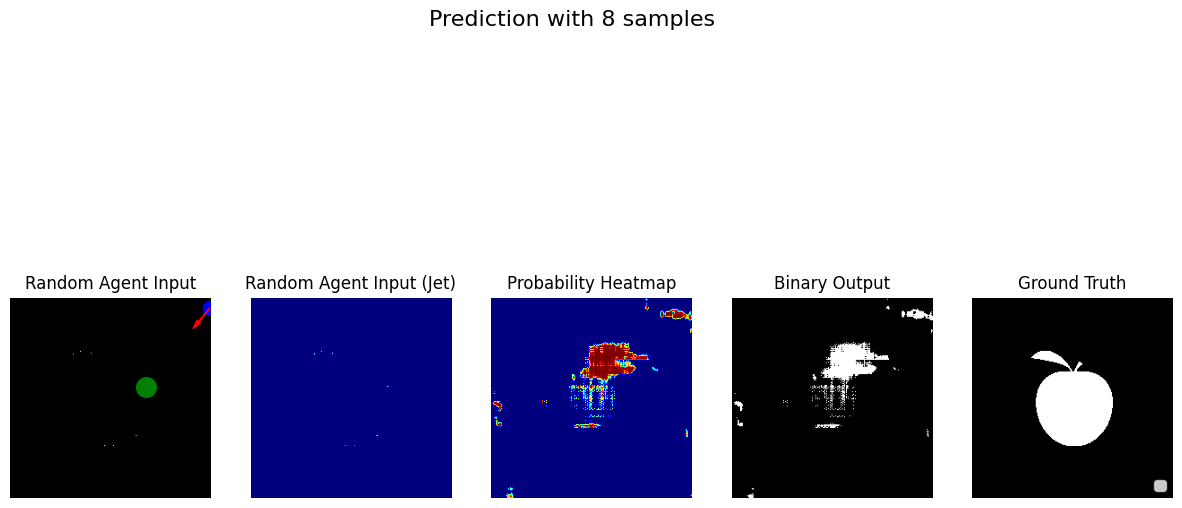

2040
Selected Border Point (x, y): (23, 0)
Ray Shooting Angle: 53 degrees
Ray Shooting Result: (x, y) = (88, 86)
Angle for Ray: 53 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


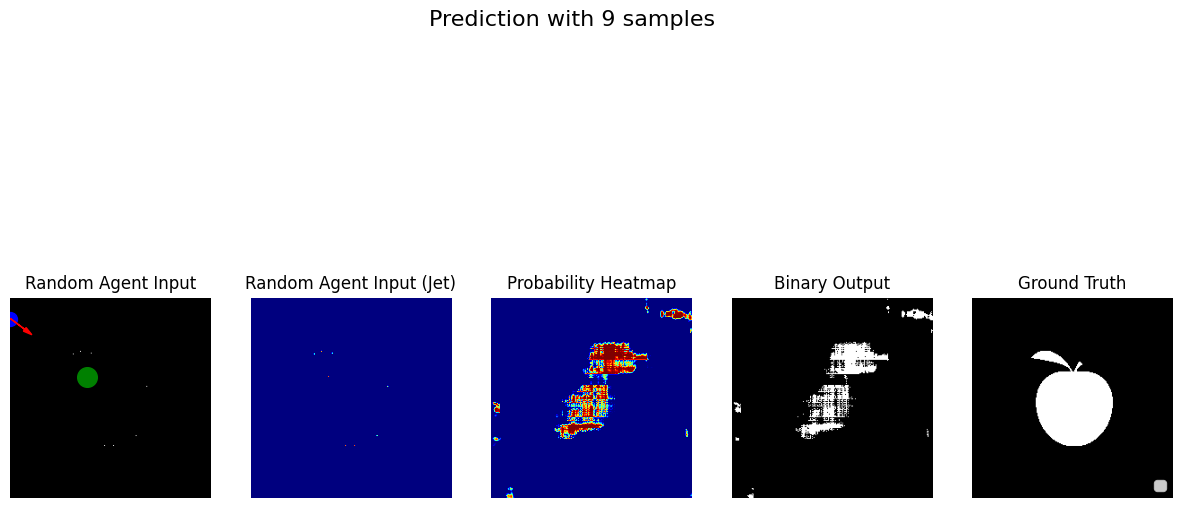

2295
Selected Border Point (x, y): (0, 32)
Ray Shooting Angle: 49 degrees
Ray Shooting Result: (x, y) = (75, 118)
Angle for Ray: 49 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


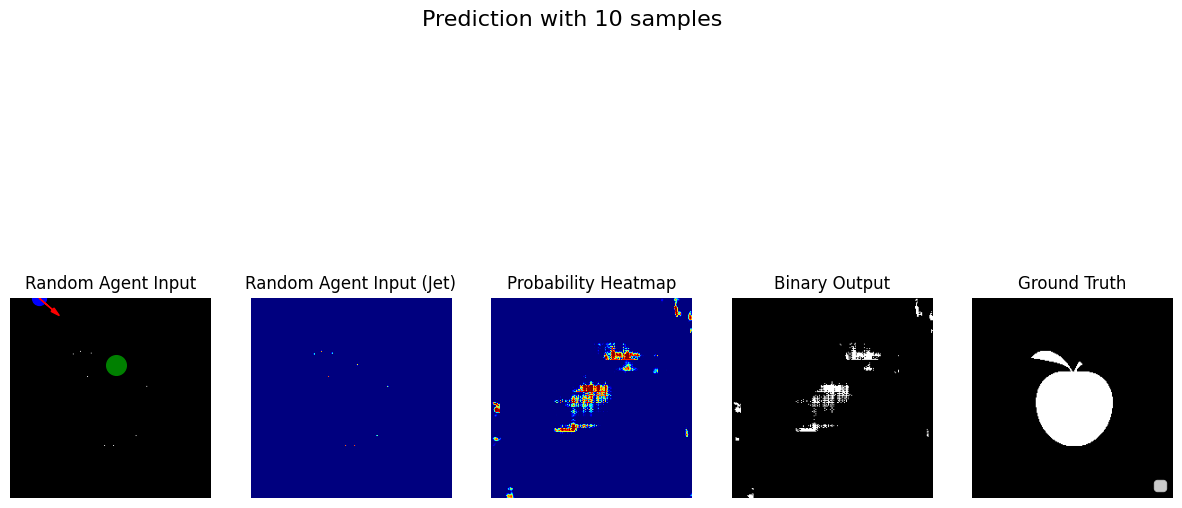

2550
Selected Border Point (x, y): (0, 207)
Ray Shooting Angle: 298 degrees
Ray Shooting Result: (x, y) = (62, 91)
Angle for Ray: 298 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


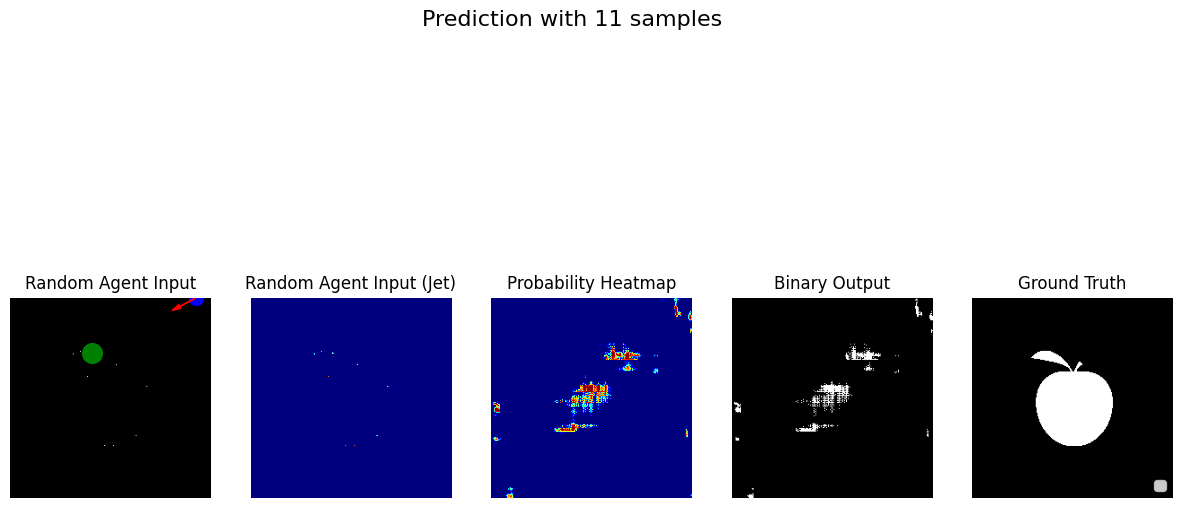

2805
Selected Border Point (x, y): (142, 0)
Ray Shooting Angle: 92 degrees
Ray Shooting Result: (x, y) = (139, 76)
Angle for Ray: 92 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


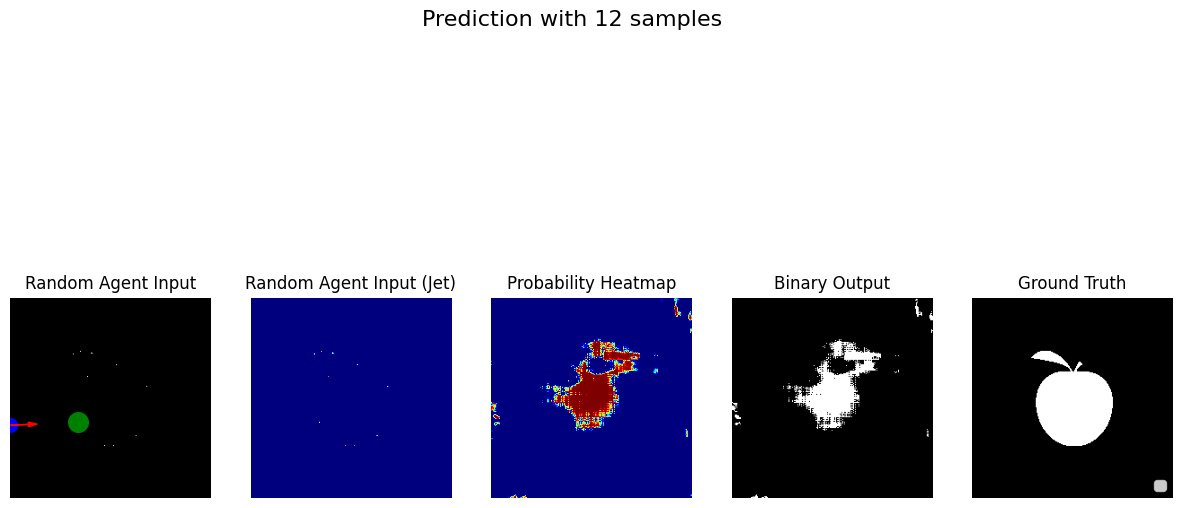

3060
Selected Border Point (x, y): (106, 223)
Ray Shooting Angle: 283 degrees
Ray Shooting Result: (x, y) = (122, 156)
Angle for Ray: 283 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


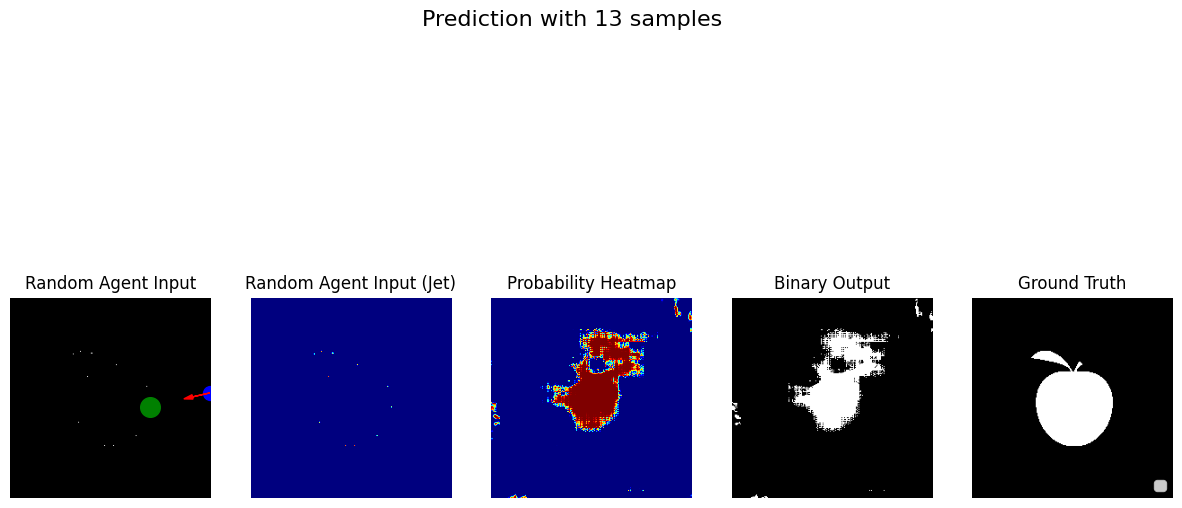

3315
Selected Border Point (x, y): (0, 196)
Ray Shooting Angle: 328 degrees
Ray Shooting Result: (x, y) = (87, 141)
Angle for Ray: 328 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


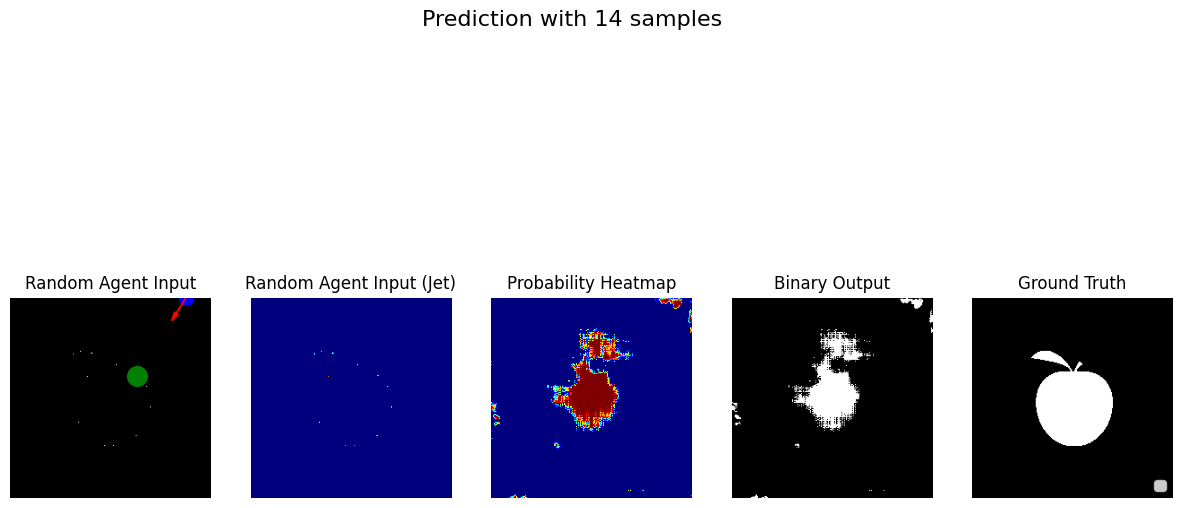

3570
Selected Border Point (x, y): (202, 0)
Ray Shooting Angle: 133 degrees
Ray Shooting Result: (x, y) = (133, 74)
Angle for Ray: 133 degrees
Output Image Shape: (224, 224)
Binary Mask Shape: (224, 224)


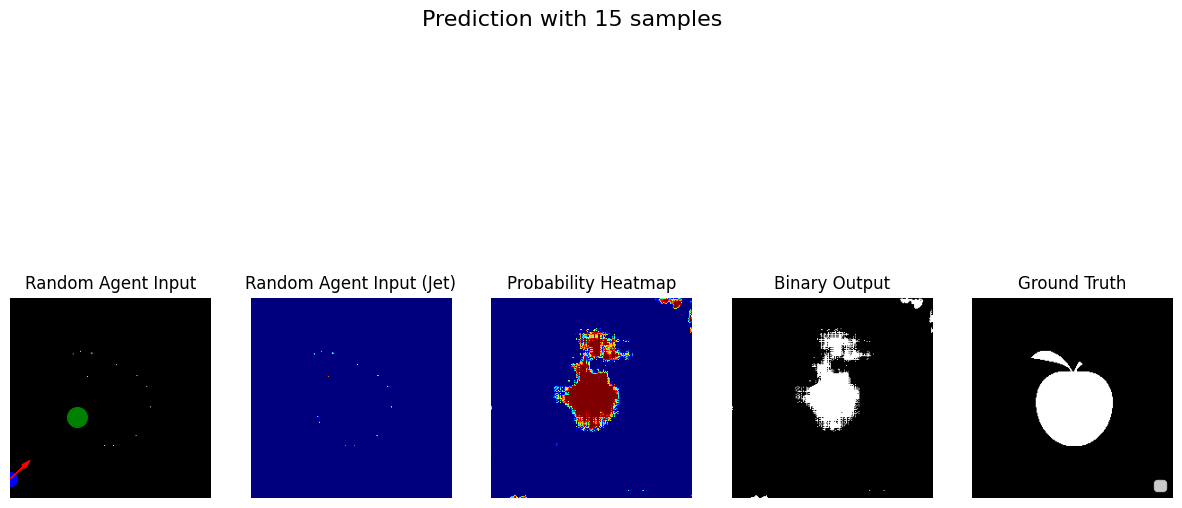

In [5]:
from visualization.view_result import ray_shooting
import numpy as np
import torch
import matplotlib.pyplot as plt

# Random agent simulation
# Assuming `target_image` is a numpy array or similar object
length, height = target_image.shape  # .shape is an attribute, not a method
print("Length and height =", length, height)

num_samples = 15
i=0

# Create a black image
image_black = np.zeros((length, height), dtype=np.uint8)  # Values from 0 to 255

while (i<num_samples):
    # Generate random border and angle for ray shooting
    border = np.random.randint(2 * (length + height - 1))
    angle = np.random.randint(360)

    border = number_to_border(border, 224, 224)
    
    # Perform ray shooting
    x, y = ray_shooting(border, angle, length, height, target_image)
    
    if x is None or y is None:
        continue
    elif x is not None and y is not None:
        image_black[x][y] = 255

    i = i+1
    print(np.sum(image_black))
    print(f"Selected Border Point (x, y): {border}")
    print(f"Ray Shooting Angle: {angle} degrees")

    print(f"Ray Shooting Result: (x, y) = ({x}, {y})")
    print(f"Angle for Ray: {angle} degrees")
    # Convert input array to a tensor suitable for the model
    input_tensor = torch.tensor(image_black, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    input_tensor = input_tensor.unsqueeze(1)  # Add channel dimension

    # Evaluate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for evaluation
        output = model(input_tensor)  # Get the model's predictions

    # Convert the model output to a probability map and binary mask
    output_image = output[0][0].cpu().numpy()  # Get the first output channel as a numpy array
    binary_output = (output_image > 0.5).astype(np.uint8)  # Thresholding to create a binary mask

    # Print shape of the output image and binary output for clarity
    print(f"Output Image Shape: {output_image.shape}")
    print(f"Binary Mask Shape: {binary_output.shape}")

    # Visualization using Matplotlib
    plt.figure(figsize=(15, 8))

    # Input visualization
    plt.subplot(1, 5, 1)
    plt.imshow(image_black, cmap='gray')
    plt.title('Random Agent Input')
    plt.axis('off')

      # Add a blue dot for the border point
    plt.scatter(border[1], border[0], color='blue', s=100, label='Border Point')  # Adjust s for dot size

    # Add an arrow for the angle
    arrow_length = 20  # Adjust the length of the arrow
    arrow_dx = arrow_length * np.cos(np.radians(angle))  # Calculate arrow x component
    arrow_dy = arrow_length * np.sin(np.radians(angle))  # Calculate arrow y component
    plt.arrow(border[1], border[0], arrow_dy, arrow_dx, head_width=5, head_length=10, fc='red', ec='red', label='Angle')

    # Highlight the found point
    if x is not None and y is not None:
        plt.scatter(y, x, color='green', s=200, label='Found Point')  # Larger marker for found point


    # Input visualization in jet colormap
    plt.subplot(1, 5, 2)
    plt.imshow(image_black, cmap='jet')
    plt.title('Random Agent Input (Jet)')
    plt.axis('off')

  
    # Probability heatmap
    plt.subplot(1, 5, 3)
    plt.imshow(output_image, cmap='jet')
    plt.title('Probability Heatmap')
    plt.axis('off')

    # Binary output visualization
    plt.subplot(1, 5, 4)
    plt.imshow(binary_output, cmap='gray')
    plt.title('Binary Output')
    plt.axis('off')

    # Ground truth visualization
    plt.subplot(1, 5, 5)
    plt.imshow(target_image, cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    plt.suptitle(f"Prediction with {i} samples", fontsize=16)

    # Display the plots
    plt.legend(loc='lower right')
    plt.show()



